# Tensorflow basis

## Example 1

Eager calculations in tensorflow

Add two variables a = 1 and b = 10


In [ ]:
# Example
import numpy as np
import tensorflow as tf

print(tf.executing_eagerly())

a = tf.Variable(1)
b = tf.Variable(10)
c = a + b
print(c.numpy())

True
11


## Example 2


In [ ]:
# Example
import numpy as np
import tensorflow as tf

@tf.function
def add(a,b):
  return a + b

def sub(a,b):
  return a - b

a = tf.Variable(5)
b = tf.Variable(6)
c = tf.Variable(1)

x = add(a,sub(b,c))
print(x.numpy())


10


# Task 1

Calculate by Tensorflow folowing expression $y = a * b + c$.

a,b, and c are 2x2 matrixes. Numbers in matrixes depends on your choice.
Multiplication is elementwise.


In [ ]:
import tensorflow as tf
a = tf.Variable([[1, 2], [3, 4]], dtype=tf.float32)
b = tf.Variable([[7,8],[9,10]], dtype = tf.float32)
c = tf.Variable([[11,12],[13,14]], dtype = tf.float32)

y = (a*b) + c
print(y.numpy())

[[18. 28.]
 [40. 54.]]



# Example 3

Draw a graf of the function $y=f(x)=x^2$ and its derivatice $y'=f'(x). Use Tensoflow for derivative calculation.

[9. 4. 1. 0. 1. 4. 9.]
[-6. -4. -2.  0.  2.  4.  6.]


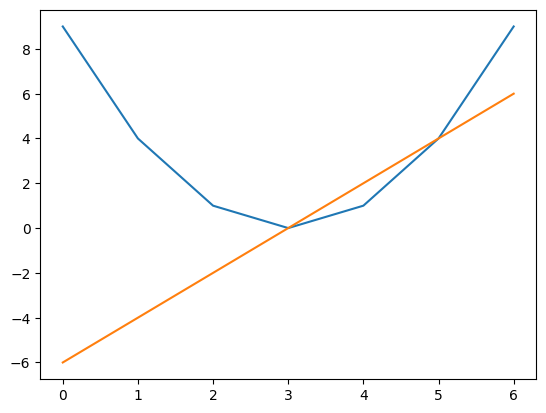

In [ ]:
# Example
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

@tf.function
def f(x):
  y = x*x
  return y

@tf.function
def dfdx(x):
  z = f(x)
  return tf.gradients(z, x)[0]

x = tf.Variable([-3.,-2.,-1.,0.,1.,2.,3.])
print(f(x).numpy())
print(dfdx(x).numpy())


plt.plot(f(x))
plt.plot(dfdx(x))

# Task 2

Draw a graf of the function $y=\sigma(x)=\frac{1}{1+e^{-x}}$ and its derivative $y'=s'(x)$. Use Tensoflow for derivative calculation.

tf.Tensor(
[4.53958077e-05 5.55575620e-05 6.79936937e-05 8.32130942e-05
 1.01838442e-04 1.24631609e-04 1.52524715e-04 1.86658091e-04
 2.28426653e-04 2.79536554e-04 3.42074339e-04 4.18591319e-04
 5.12206458e-04 6.26731702e-04 7.66824507e-04 9.38173215e-04
 1.14772200e-03 1.40394326e-03 1.71716676e-03 2.09997591e-03
 2.56768332e-03 3.13889855e-03 3.83620191e-03 4.68693782e-03
 5.72413978e-03 6.98759437e-03 8.52504404e-03 1.03935138e-02
 1.26607241e-02 1.54065171e-02 1.87241696e-02 2.27213903e-02
 2.75206964e-02 3.32587242e-02 4.00838615e-02 4.81513998e-02
 5.76152215e-02 6.86149280e-02 8.12573764e-02 9.55919842e-02
 1.11580066e-01 1.29060077e-01 1.47712989e-01 1.67034879e-01
 1.86326443e-01 2.04710159e-01 2.21183725e-01 2.34711795e-01
 2.44347497e-01 2.49363393e-01 2.49363393e-01 2.44347497e-01
 2.34711795e-01 2.21183725e-01 2.04710159e-01 1.86326443e-01
 1.67034879e-01 1.47712989e-01 1.29060077e-01 1.11580066e-01
 9.55919842e-02 8.12573764e-02 6.86149280e-02 5.76152215e-02
 4.81513998e-

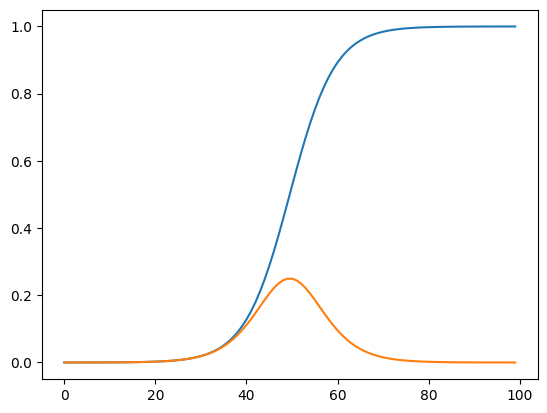

In [ ]:
def sig(x):
  return 1/(1+tf.exp(-x))

x = tf.Variable(np.linspace(-10,10,100))

with tf.GradientTape(persistent=True) as t:
  t.watch([x,y])
  y = sig(x)

z = t.gradient(y,x)

print(z)
print(sig(x).numpy().astype('float32'))

plt.plot(sig(x))
plt.plot(z)


# Task 3

Calculate the gradient of function $y=g(x,y)=e^{-\frac{x^2+y^2}{2\sigma^2}}$ for $\sigma^2 = 0.5\;\mbox{and}\;x = 1\;\mbox{and}\;y = 1$

In [ ]:
x = tf.Variable(1.0)
y = tf.Variable(1.0)
sig = 0.5

def grad(x , y, sig):
  return tf.exp(-(x**2 + y**2)/(2*sig))

with tf.GradientTape(persistent=True) as t:
  t.watch([x,y])
  z = grad(x,y,sig)

df_gradx = t.gradient(z,x)
df_grady = t.gradient(z,y)

print(grad(x,y,sig).numpy())
print(df_gradx.numpy())
print(df_grady.numpy())

0.13533528
-0.27067056
-0.27067056


# Task 4

Create a simple neural feed forward neural network using Tensorflow.

Input layer -> hidden layer -> output layer

for IRIS dataset

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/iris-enc.csv")
df1 = df[['x1','x2','x3','x4']]
df1

,x1,x2,x3,x4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/iris-enc.csv')
df1 = df[['x1','x2','x3','x4']]
df1

,x1,x2,x3,x4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
x = df1
y = df[['x5','x6','x7']]

x_min = np.min(x, axis = 0)
x_max = np.max(x, axis =0)

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.33, random_state=42)

trainx_scaled = (train_x - x_min) / (x_max - x_min)
testx_scaled = (test_x - x_min) / (x_max - x_min)

print(trainx_scaled)
print(testx_scaled)

           x1        x2        x3        x4
96   0.388889  0.375000  0.542373  0.500000
105  0.916667  0.416667  0.949153  0.833333
66   0.361111  0.416667  0.593220  0.583333
0    0.222222  0.625000  0.067797  0.041667
122  0.944444  0.333333  0.966102  0.791667
..        ...       ...       ...       ...
71   0.500000  0.333333  0.508475  0.500000
106  0.166667  0.208333  0.593220  0.666667
14   0.416667  0.833333  0.033898  0.041667
92   0.416667  0.250000  0.508475  0.458333
102  0.777778  0.416667  0.830508  0.833333

[100 rows x 4 columns]
           x1        x2        x3        x4
73   0.500000  0.333333  0.627119  0.458333
18   0.388889  0.750000  0.118644  0.083333
118  0.944444  0.250000  1.000000  0.916667
78   0.472222  0.375000  0.593220  0.583333
76   0.694444  0.333333  0.644068  0.541667
31   0.305556  0.583333  0.084746  0.125000
64   0.361111  0.375000  0.440678  0.500000
141  0.722222  0.458333  0.694915  0.916667
68   0.527778  0.083333  0.593220  0.583333
82   0.4

In [ ]:
x = df1
y = df[['x5','x6','x7']]

x_min = np.min(x, axis=0)
x_max = np.max(x, axis=0)

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.33, random_state = 42)

X_train_scaled = (train_x - x_min)/ (x_max - x_min)
X_test_scaled = (test_x - x_min) / (x_max - x_min)


print(x_max)
print(X_test_scaled)

x1    7.9
x2    4.4
x3    6.9
x4    2.5
dtype: float64
           x1        x2        x3        x4
73   0.500000  0.333333  0.627119  0.458333
18   0.388889  0.750000  0.118644  0.083333
118  0.944444  0.250000  1.000000  0.916667
78   0.472222  0.375000  0.593220  0.583333
76   0.694444  0.333333  0.644068  0.541667
31   0.305556  0.583333  0.084746  0.125000
64   0.361111  0.375000  0.440678  0.500000
141  0.722222  0.458333  0.694915  0.916667
68   0.527778  0.083333  0.593220  0.583333
82   0.416667  0.291667  0.491525  0.458333
110  0.611111  0.500000  0.694915  0.791667
12   0.138889  0.416667  0.067797  0.000000
36   0.333333  0.625000  0.050847  0.041667
9    0.166667  0.458333  0.084746  0.000000
19   0.222222  0.750000  0.084746  0.083333
56   0.555556  0.541667  0.627119  0.625000
104  0.611111  0.416667  0.813559  0.875000
69   0.361111  0.208333  0.491525  0.416667
55   0.388889  0.333333  0.593220  0.500000
132  0.583333  0.333333  0.779661  0.875000
29   0.111111  0.5000

In [ ]:
import tensorflow
from tensorflow.keras.optimizers import Adam
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(4,)))
model.add(tf.keras.layers.Dense(8, activation = 'sigmoid'))
model.add(tf.keras.layers.Dense(3, activation = 'sigmoid'))

model.compile(loss = 'mean_squared_error', metrics = ['accuracy'], optimizer = tf.keras.optimizers.Adam(learning_rate=0.05))

history = model.fit(trainx_scaled,train_y, epochs = 50, batch_size = 8, validation_data = (testx_scaled,test_y))
test_loss, test_acc = model.evaluate(testx_scaled,test_y)
print("test_accuracy:",test_acc)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.3454 - loss: 0.2527 - val_accuracy: 0.3800 - val_loss: 0.2089
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4732 - loss: 0.2073 - val_accuracy: 0.7000 - val_loss: 0.1818
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6600 - loss: 0.1752 - val_accuracy: 0.8200 - val_loss: 0.1398
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7443 - loss: 0.1401 - val_accuracy: 0.7000 - val_loss: 0.1117
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6913 - loss: 0.1245 - val_accuracy: 0.9200 - val_loss: 0.1002
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8309 - loss: 0.1022 - val_accuracy: 0.9400 - val_loss: 0.0940
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9307 - loss: 0.0989 - val_accuracy: 0.9800 - val_loss: 0.0899
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8810 - loss: 0.0965 - val_accuracy: 0.8200 - v

In [ ]:
predictions = model.predict(testx_scaled)

predicted_classes = tf.argmax(predictions, axis =1)

true_classes = tf.argmax(test_y, axis=1) if test_y.shape[1] > 1 else test_y

confusion_mat = tf.math.confusion_matrix(true_classes, predicted_classes)
print(confusion_mat)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
tf.Tensor(
[[15  1  0]
 [ 0 15  0]
 [ 0  0 19]], shape=(3, 3), dtype=int32)
